# Chapter5-3

## 自然言語推論

## ライブラリのインストール

In [1]:
!pip install transformers[ja,torch] datasets matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 

## 学習

In [2]:
from pprint import pprint
from datasets import load_dataset

#  データセットを読み込む
train_dataset = load_dataset(
    "llm-book/JGLUE", name="JNLI", split="train"
)

valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JNLI", split="validation"
)

# データセットのラベル情報を表示
print(train_dataset.features["label"])
print(valid_dataset.features["label"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for llm-book/JGLUE contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/llm-book/JGLUE
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.w

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for llm-book/JGLUE contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/llm-book/JGLUE
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


ClassLabel(names=['entailment', 'contradiction', 'neutral'], id=None)
ClassLabel(names=['entailment', 'contradiction', 'neutral'], id=None)


entailment : 含意
contradiction : 矛盾
neutral : 中立

In [3]:
# データ列を表示
pprint(train_dataset[0])

{'label': 2,
 'sentence1': '二人の男性がジャンボジェット機を見ています。',
 'sentence2': '2人の男性が、白い飛行機を眺めています。',
 'sentence_pair_id': '0',
 'yjcaptions_id': '100124-104404-104405'}


sentence1 : 前提文<br>
sentence2 : 仮説文

In [4]:
from transformers import BatchEncoding

def preprocess_text_pair_classification(example: dict[str, str | int]) -> BatchEncoding:
  """ 文ペア関係予測の事例をトークナイズし、IDに変換する """

  encoded_example = tokenizer(
      example["sentence1"], example["sentence2"], max_length=128
  )

  encoded_example["labels"] = example["label"]
  return encoded_example

In [5]:
# トークンの出力を確認する
from transformers import AutoTokenizer

# 事前学習済みモデルの取得
transformers_model_name = "cl-tohoku/bert-base-japanese-v3"
tokenizer = AutoTokenizer.from_pretrained(transformers_model_name)

example=train_dataset[0]
encoded_example = preprocess_text_pair_classification(example)
print(tokenizer.convert_ids_to_tokens(encoded_example["input_ids"]))

tokenizer_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/231k [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


['[CLS]', '二人', 'の', '男性', 'が', 'ジャンボ', 'ジェット', '機', 'を', '見', 'て', 'い', 'ます', '。', '[SEP]', '2', '人', 'の', '男性', 'が', '、', '白い', '飛行', '機', 'を', '眺め', 'て', 'い', 'ます', '。', '[SEP]']


## データセットの統計の可視化

100%|██████████| 20073/20073 [00:04<00:00, 4343.08it/s]


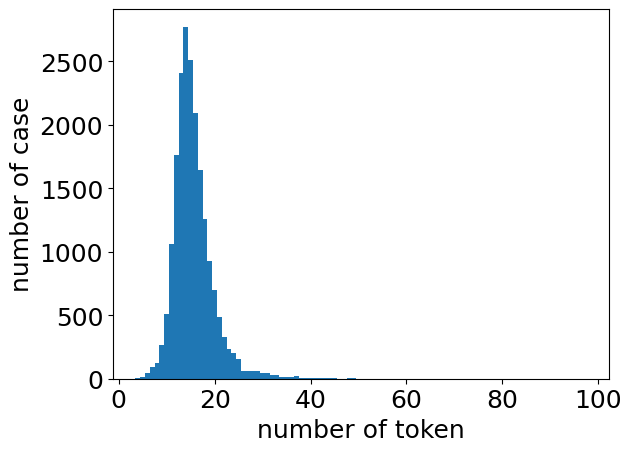

100%|██████████| 2434/2434 [00:00<00:00, 5239.05it/s]


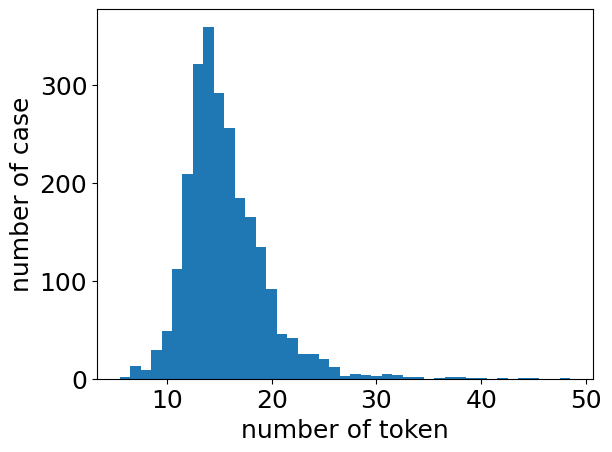

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_text_length(dataset: Dataset):

  # データセットの中のテキストの長さを数える
  length_counter = Counter()
  for data in tqdm(dataset):

    length = len(tokenizer.tokenize(data["sentence1"]))
    length_counter[length] += 1

  # グラフの描画
  plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
  plt.xlabel("number of token")
  plt.ylabel("number of case")
  plt.show()

# 学習用、検証用のデータセットをそれぞれグラフ化
visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

## データセットの前処理

In [7]:
encoded_train_dataset = train_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=train_dataset.column_names
)

encoded_valid_dataset = valid_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=valid_dataset.column_names
)

Parameter 'function'=<function preprocess_text_pair_classification at 0x7e5fb0861c60> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/20073 [00:00<?, ? examples/s]

Map:   0%|          | 0/2434 [00:00<?, ? examples/s]

In [8]:
# 前処理後のデータを確認
print(encoded_train_dataset)
print(encoded_valid_dataset)

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 20073
})
Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 2434
})


## ミニバッチの構築

In [9]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [10]:
batch_inputs = data_collator(encoded_train_dataset[0:4])

pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 31]),
 'input_ids': torch.Size([4, 31]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 31])}


## 学習するためのモデルを準備する

In [11]:
from transformers import AutoModelForSequenceClassification

class_label = train_dataset.features["label"]
label2id = {label: id for id, label in enumerate(class_label.names)}
id2label = {id : label for id, label in enumerate(class_label.names)}

# モデルの読み込み
model = AutoModelForSequenceClassification.from_pretrained(
    transformers_model_name,
    num_labels=class_label.num_classes,
    label2id=label2id,
    id2label=id2label
)

print(type(model).__name__)

config.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/447M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification


In [12]:
print(model.forward(**data_collator(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(1.7968, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.4404,  0.1541, -1.0340],
        [ 0.4129,  0.1457, -1.0552],
        [ 0.4160,  0.1383, -1.0804],
        [ 0.3929,  0.1185, -1.0583]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [13]:
# 各種パラメータを設定する
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Learning_LLM/chapter5/checkpoint", # 結果を保存するフォルダ
    per_device_train_batch_size=32, # 学習時のバッチサイズ
    per_device_eval_batch_size=32, # 評価時のバッチサイズ
    learning_rate=2e-5, # 学習率
    lr_scheduler_type="linear", # 学習率スケジュラーの種類
    warmup_ratio=0.1, # 学習率のウォームアップの長さを指定
    num_train_epochs=3, # エポック数
    save_strategy="epoch", # チェックポイントの保存のタイミング (今回は1エポック毎に行う)
    logging_strategy="epoch", # ロギングのタイミング (1エポック毎)
    evaluation_strategy="epoch", # 検証セットによる評価のタイミング(1エポック毎)
    load_best_model_at_end=True, # 学習後に最良のモデルをロードさせる
    metric_for_best_model="accuracy", # 最良のモデルを決定する際の評価指標
    fp16=True, # 自動混合制度演算を有効にする
)

In [17]:
# モデルの評価方法を定義
import numpy as np

def compute_accuracy(eval_pred: tuple[np.ndarray, np.ndarray]) -> dict[str, float]:

  predictions, labels = eval_pred

  predictions = np.argmax(predictions, axis=1)

  return {"accuracy" : (predictions == labels).mean()}

In [18]:
# 学習の開始
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_accuracy
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/Learning_LLM/chapter5/model")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.506700,0.299912,0.892358
2,0.210300,0.323178,0.900164
3,0.129000,0.332200,0.908792


In [19]:
# トークナイザーの保存
tokenizer.save_pretrained("/content/drive/MyDrive/Learning_LLM/chapter5/model")

('/content/drive/MyDrive/Learning_LLM/chapter5/model/tokenizer_config.json',
 '/content/drive/MyDrive/Learning_LLM/chapter5/model/special_tokens_map.json',
 '/content/drive/MyDrive/Learning_LLM/chapter5/model/vocab.txt',
 '/content/drive/MyDrive/Learning_LLM/chapter5/model/added_tokens.json')

## 学習したモデルを推論する

In [21]:
trainer.evaluate()

{'eval_loss': 0.33220013976097107,
 'eval_accuracy': 0.9087921117502055,
 'eval_runtime': 2.4507,
 'eval_samples_per_second': 993.174,
 'eval_steps_per_second': 31.419,
 'epoch': 3.0}

In [23]:
# 学習したモデルを呼び出して検証する
model_name = "/content/drive/MyDrive/Learning_LLM/chapter5/model"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# データセットを準備
valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JNLI", split="validation"
)

# 読み込んだデータセットをトークナイゼーション化
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=valid_dataset.column_names
)

# 評価を実行
trainer = Trainer(
    model=model,
    eval_dataset=encoded_valid_dataset,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_accuracy
)

eval_metrics = trainer.evaluate()
pprint(eval_metrics)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for llm-book/JGLUE contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/llm-book/JGLUE
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Map:   0%|          | 0/2434 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


{'eval_accuracy': 0.9087921117502055,
 'eval_loss': 0.3322232961654663,
 'eval_runtime': 4.8248,
 'eval_samples_per_second': 504.477,
 'eval_steps_per_second': 63.215}


In [29]:
# 上記のモデルをpipelineで実行してみる (※pipelineで使う際はモデルをhugging faceに上げていることが前提になっている？)
from transformers import pipeline

model_name = './drive/MyDrive/Learning_LLM/chapter5/model/'
nli_pipeline = pipeline(model=model_name, tokenizer=model_name)

# 実行
text1 = input("テキストを入力: ")
text2 = input("テキストを入力: ")

print(nli_pipeline({"text": text1, "text_pair": text2}))

RuntimeError: Instantiating a pipeline without a task set raised an error: Repo id must be in the form 'repo_name' or 'namespace/repo_name': './drive/MyDrive/Learning_LLM/chapter5/model/'. Use `repo_type` argument if needed.